In [1]:
import graphlab

graphlab.canvas.set_target('ipynb')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1541843254.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1541843254.log


This non-commercial license of GraphLab Create for academic use is assigned to gaurav.agrawal@zs.com and will expire on October 05, 2019.


In [2]:
import math
import random

In [3]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [4]:
y = x.apply(lambda x: math.sin(4*x))

In [5]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

In [6]:
data = graphlab.SFrame({'X1':x,'Y':y})
data

Columns:
	X1	float
	Y	float

Rows: 30

Data:
+-----------------+----------------+
|        X1       |       Y        |
+-----------------+----------------+
| 0.0395789449501 | 0.587050191026 |
| 0.0415680996791 | 0.648655851372 |
| 0.0724319480801 | 0.307803309485 |
|  0.150289044622 | 0.310748447417 |
|  0.161334144502 | 0.237409625496 |
|  0.191956312795 | 0.705017157224 |
|  0.232833917145 | 0.461716676992 |
|  0.259900980166 | 0.383260507851 |
|  0.380145814869 | 1.06517691429  |
|  0.432444723508 | 1.03184706949  |
+-----------------+----------------+
[30 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

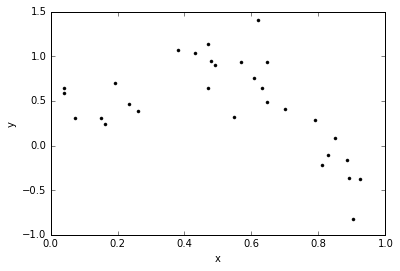

In [7]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

In [8]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [9]:
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    return model